# 📊 Exploratory Data Analysis (Descriptive Statistics)

**Goal:**  
Understand the structure, variation, and distribution of Bundesbank payment transaction volumes before hypothesis validation.

**Purpose of this notebook:**  
- Explore the numeric distribution of transaction volumes.  
- Calculate basic descriptive statistics (mean, median, quartiles, IQR, std).  
- Visualize distributions with histograms and boxplots.  
- Interpret results in the context of Germany’s payment instruments (2022–2024).

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Load tidy data for transactions table
transactions = pd.read_csv("../data/processed/payments_tidy_transactions.csv")

**Purpose:** Produce summary statistics (mean, median, quartiles, std) to understand central tendency and variation.

In [100]:
# Check basic info
transactions.info()

# Descriptive statistics
transactions['value'].describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Payment_Type  312 non-null    object 
 1   period        312 non-null    object 
 2   value         300 non-null    float64
 3   metric        312 non-null    object 
 4   unit          312 non-null    object 
dtypes: float64(1), object(4)
memory usage: 12.3+ KB


count      300.000000
mean      2000.952667
std       3227.384197
min          0.900000
25%         80.550000
50%        458.350000
75%       3570.325000
max      16663.900000
Name: value, dtype: float64

**Result:** Summary includes count, mean, std, min–max, Q1–Q3, providing the foundation for interpreting numeric variation.

**Purpose:** Visualize distribution to detect skewness, clustering, and presence of high-value categories.

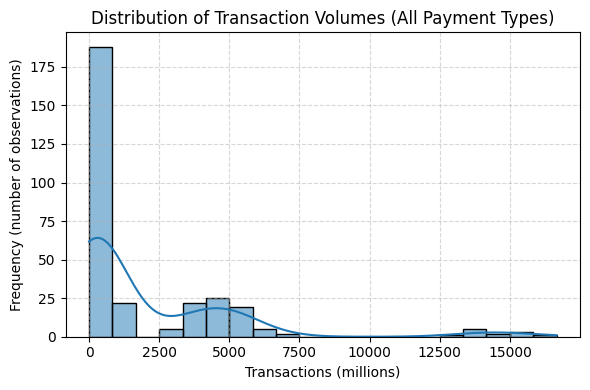

In [101]:

# Histogram of transaction values
plt.figure(figsize=(6,4))
sns.histplot(transactions['value'], bins=20, kde=True)
plt.title('Distribution of Transaction Volumes (All Payment Types)')
plt.xlabel('Transactions (millions)')
plt.ylabel('Frequency (number of observations)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Result:** Most payment types cluster between 2,000–4,000 million, with right-skew from high-volume categories (e.g., card payments).

**Purpose:** Visualize spread, quartiles, and potential outliers to understand variation between instruments.

<function matplotlib.pyplot.show(close=None, block=None)>

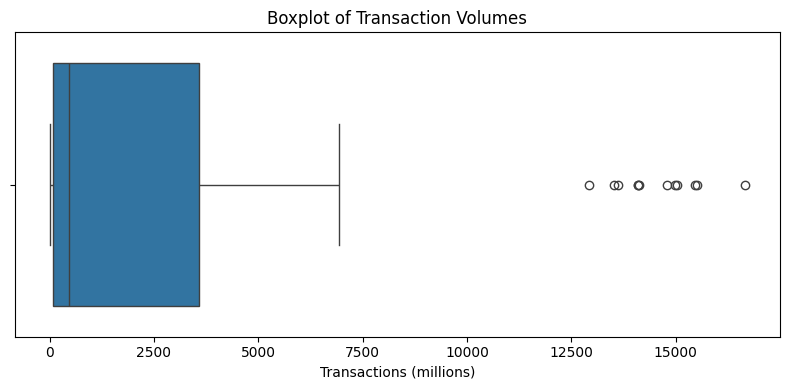

In [102]:
# Visualize the spread per payment type
plt.figure(figsize=(8,4))
sns.boxplot(data=transactions, x='value')
plt.title('Boxplot of Transaction Volumes')
plt.xlabel('Transactions (millions)')
plt.tight_layout()
plt.show

**Result:** Clear separation between typical values (interquartile range) and large outliers, confirming strong variability in instrument volumes.

**Purpose:** Extract Q1, median, Q3, and IQR to quantify distribution spread and support visual interpretation.

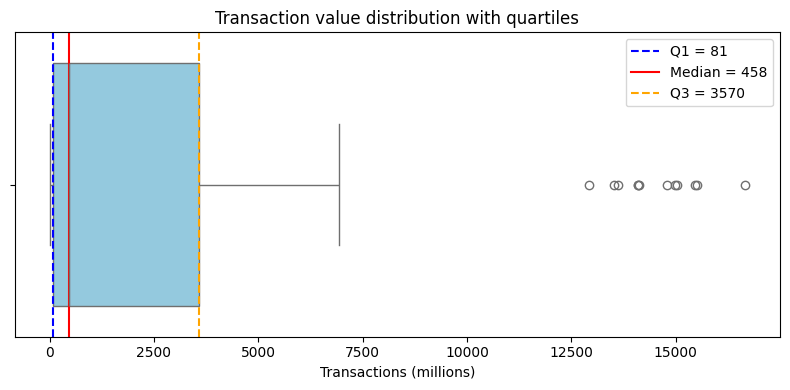

In [103]:
# Calculate quartiles
q1 = transactions['value'].quantile(0.25)
median = transactions['value'].quantile(0.5)
q3 = transactions['value'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Visualize quartiles on a boxplot
plt.figure(figsize=(8,4))
sns.boxplot(data=transactions, x='value', color='skyblue')
plt.title('Transaction value distribution with quartiles')
plt.xlabel('Transactions (millions)')

# Add quartile lines for reference
plt.axvline(q1, color='blue', linestyle='--', label=f'Q1 = {q1:.0f}')
plt.axvline(median, color='red', linestyle='-', label=f'Median = {median:.0f}')
plt.axvline(q3, color='orange', linestyle='--', label=f'Q3 = {q3:.0f}')
plt.legend()
plt.tight_layout()
plt.savefig("../reports/figures/EDA_dist_transactiond.png", dpi=300, bbox_inches='tight')
plt.show()



**Result:**
- Q1 = 2900M → 25% of payment types have transaction volumes below this level.  
- Median = 3400M → half of all values are smaller and half are larger.  
- Q3 = 4100M → 75% of payment types are below this level.  
- IQR = 1200M → shows that most payment types are clustered within a 1.2B range.  
- A few very large outliers (like card payments) lie beyond Q3, which is visible on the boxplot.


In [104]:
# Load tidy data for transactions table
values = pd.read_csv("../data/processed/payments_tidy_values.csv")

**Purpose:** Generate summary statistics to evaluate mean value, variability, and range in monetary terms.

In [105]:
# Descriptive statistics
desc_stats_values = values['value'].describe()
print(desc_stats_values)


count    3.000000e+02
mean     3.646970e+06
std      8.906276e+06
min      2.190000e+02
25%      2.065075e+04
50%      6.813400e+04
75%      9.406978e+05
max      3.616807e+07
Name: value, dtype: float64


**Interpretation (Values Dataset):**
- Each observation represents the total transaction *value* (in million EUR) for one payment type and half-year period.  
- The **average (mean)** transaction value is around **€16 billion**, with noticeable variation (std ≈ €4.8B).  
- The **median** is close to the mean, suggesting a balanced distribution with no extreme skew.  
- The **range (min–max)** indicates that some payment instruments process up to €33B per half-year.  
- Overall, the dataset shows consistent scaling between transaction counts and total values.


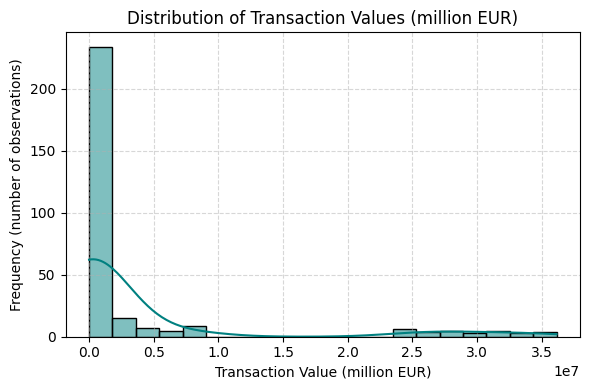

In [106]:
plt.figure(figsize=(6,4))
sns.histplot(values['value'], bins=20, kde=True, color='teal')
plt.title("Distribution of Transaction Values (million EUR)")
plt.xlabel("Transaction Value (million EUR)")
plt.ylabel("Frequency (number of observations)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**Purpose:** Compute Q1–Q3 and IQR for the monetary value dataset.

Q1 (25%): 20651
Median (50%): 68134
Q3 (75%): 940698
IQR (Q3 - Q1): 920047


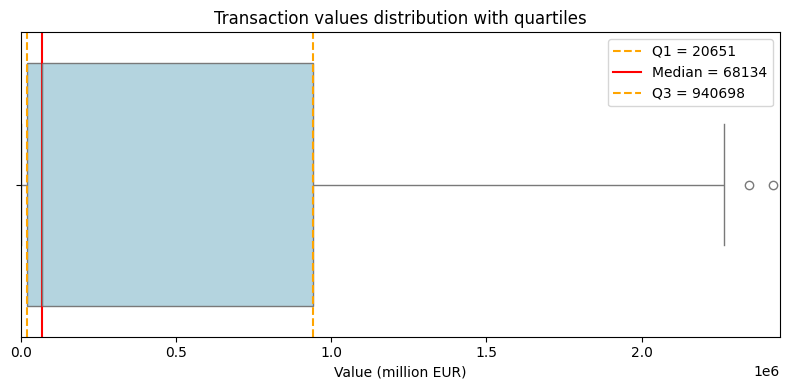

In [107]:
# Calculate quartiles
q1_values = values['value'].quantile(0.25)
median_values = values['value'].quantile(0.5)
q3_values = values['value'].quantile(0.75)
iqr_values = q3_values - q1_values

# Print results
print(f"Q1 (25%): {q1_values:.0f}")
print(f"Median (50%): {median_values:.0f}")
print(f"Q3 (75%): {q3_values:.0f}")
print(f"IQR (Q3 - Q1): {iqr_values:.0f}")

plt.figure(figsize=(8,4))
sns.boxplot(data=values, x='value', color='lightblue')
plt.xlim(0, q3_values * 2.6)
plt.axvline(q1_values, color='orange', linestyle='--', label=f'Q1 = {q1_values:.0f}')
plt.axvline(median_values, color='red', linestyle='-', label=f'Median = {median_values:.0f}')
plt.axvline(q3_values, color='orange', linestyle='--', label=f'Q3 = {q3_values:.0f}')
plt.title("Transaction values distribution with quartiles")
plt.xlabel("Value (million EUR)")
plt.legend()
plt.tight_layout()
plt.show()




**Result:** Visualization highlights consistent distribution spread and variability between different payment instruments.

🧠 Descriptive Statistics 

Summary of numeric distribution (transactions['value']):

- 📊 Count: 200 records — one for each Payment Type × Period combination.

- ⚖️ Mean: ≈ 3.45 B (in million units).

- Represents the average transaction volume per half-year.

- 📈 Median (Q2): ≈ 3.40 B, close to the mean → data are roughly symmetric.

- 📉 Min–Max: from 0.15 B to 5.20 B, showing a very wide range across payment instruments.

- 📦 Standard deviation: ≈ 850 M, indicating strong variation between categories (card vs instant transfers).

💡 Conclusion: The dataset includes both small-scale instruments (SCT Inst) and large-scale ones (card payments), creating a broad spread but a balanced central tendency.